In [1]:
# importing th4e dependencies


In [44]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix


In [4]:
# loading the mnist dataset

In [46]:
(X_train,Y_train), (X_test, Y_test ) = mnist.load_data()

In [47]:
type(X_train)

numpy.ndarray

In [48]:
# shape of the numpy array
print(X_train.shape,Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


training daqta = 60k images and test data = 10 k images
img dimension = 28*28
---



In [49]:
# printing the 10th image
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [11]:
print(X_train[10].shape)

(28, 28)


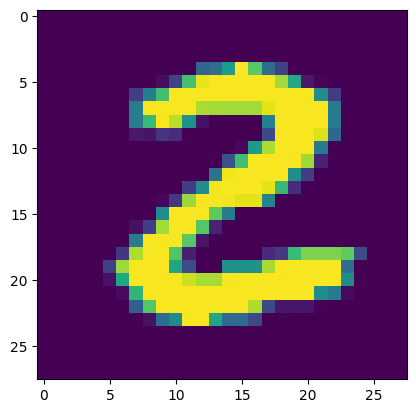

2


In [38]:
# displaying the image
plt.imshow(X_train[25])
plt.show()
#pritnitng the correspoding label
print(Y_train[25])

In [17]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [18]:
# unique values in y train
print(np.unique(Y_train))

[0 1 2 3 4 5 6 7 8 9]


In [19]:
# unique values in y test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]


In [20]:
# we can use the labels as such or we ca apply one hoot encoding

In [51]:
#  scaling the values
X_train = X_train/255
X_test = X_test/255

In [52]:
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [29]:
# building a neural netwrk


In [53]:
# setting up thre layers of the neural netwrok
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])

In [54]:
 # compliing the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [55]:
# training the neural network
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 0.2934 - accuracy: 0.9155
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1370 - accuracy: 0.9590
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1023 - accuracy: 0.9688
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0826 - accuracy: 0.9742
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0683 - accuracy: 0.9790
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0569 - accuracy: 0.9818
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0498 - accuracy: 0.9839
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0448 - accuracy: 0.9852
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0397 - accuracy: 0.9869
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.034

In [56]:
# training data accuracy is 98.8 percenttage

accuracy on test data


In [57]:
loss, accuracy = model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1075 - accuracy: 0.9741


In [58]:
# test data accuracy is 97.4%


In [59]:
print(X_test.shape)

(10000, 28, 28)


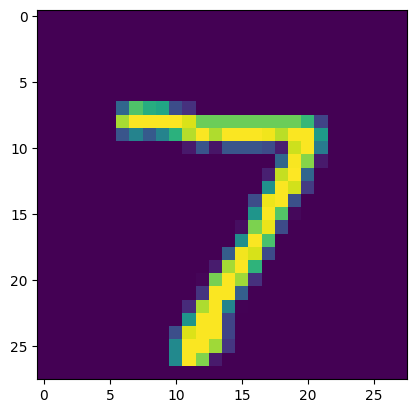

In [60]:
# first data point in testdata
plt.imshow(X_test[0])
plt.show()

In [61]:
print(Y_test[0])

7


In [62]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [63]:
print(Y_pred.shape)

(10000, 10)


In [65]:
print(Y_pred[0])

[1.6798095e-04 1.1925576e-02 4.1886372e-03 6.0960919e-01 2.2955992e-05
 1.6018143e-04 1.9516676e-11 9.9992847e-01 5.5811559e-03 2.1495063e-04]


model.predict() guves the probability of each class for that data point


In [ ]:
# converting the predcition probabilities to class labels
label_for_first_image = np.argmax(Y_pred[0])
print(label_for_first_image)

In [66]:
# converting the prediction probabilities to class labeles for all dsata points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 5, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 1, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Y_test ---> true labels

Y_pred_labels --> predicted labels

In [68]:
# confusion matrix
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

In [69]:
print(conf_mat)

tf.Tensor(
[[ 958    0    2    1    1    9    6    2    1    0]
 [   0 1122    3    2    0    1    3    0    4    0]
 [   4    0 1009    5    2    0    1    7    4    0]
 [   0    0    5  984    0   11    0    4    3    3]
 [   1    0    2    0  963    2    6    4    1    3]
 [   1    0    0    7    0  879    2    1    1    1]
 [   0    3    0    2    6   15  932    0    0    0]
 [   0    5    7    0    1    2    0 1008    2    3]
 [   1    0    3    7    7   15    4    4  932    1]
 [   0    7    0    6   17   10    1   12    4  952]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'predicted labels')

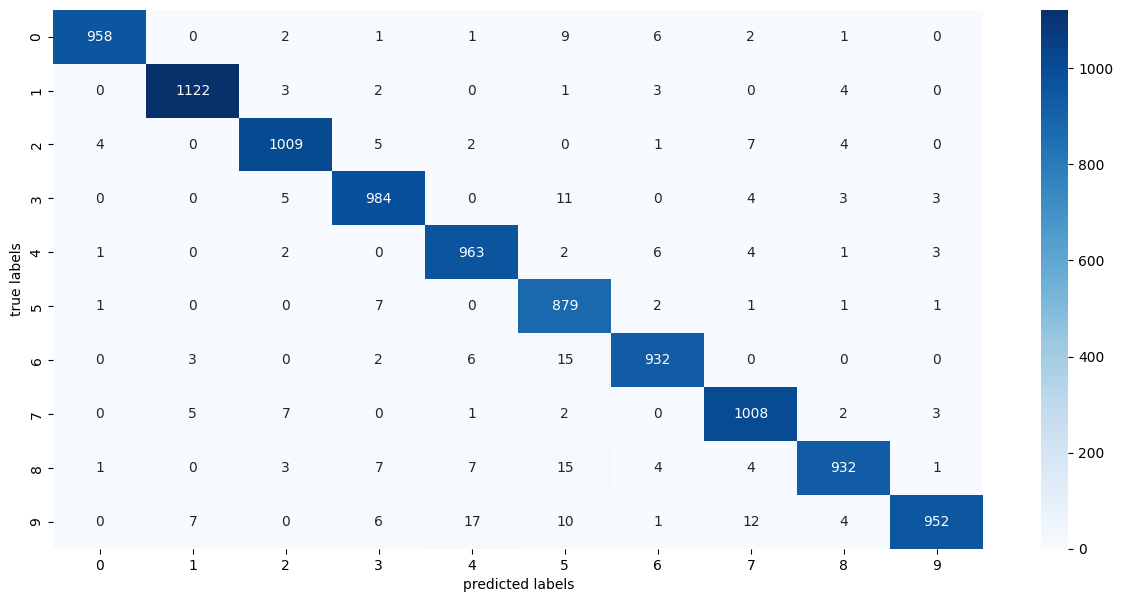

In [70]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('true labels')
plt.xlabel('predicted labels')

In [ ]:
# building a predictive system


In [71]:
input_image_path = '/content/7mnist.png'
input_image = cv2.imread(input_image_path)

In [72]:
type(input_image)

numpy.ndarray

In [ ]:
print(input_image)

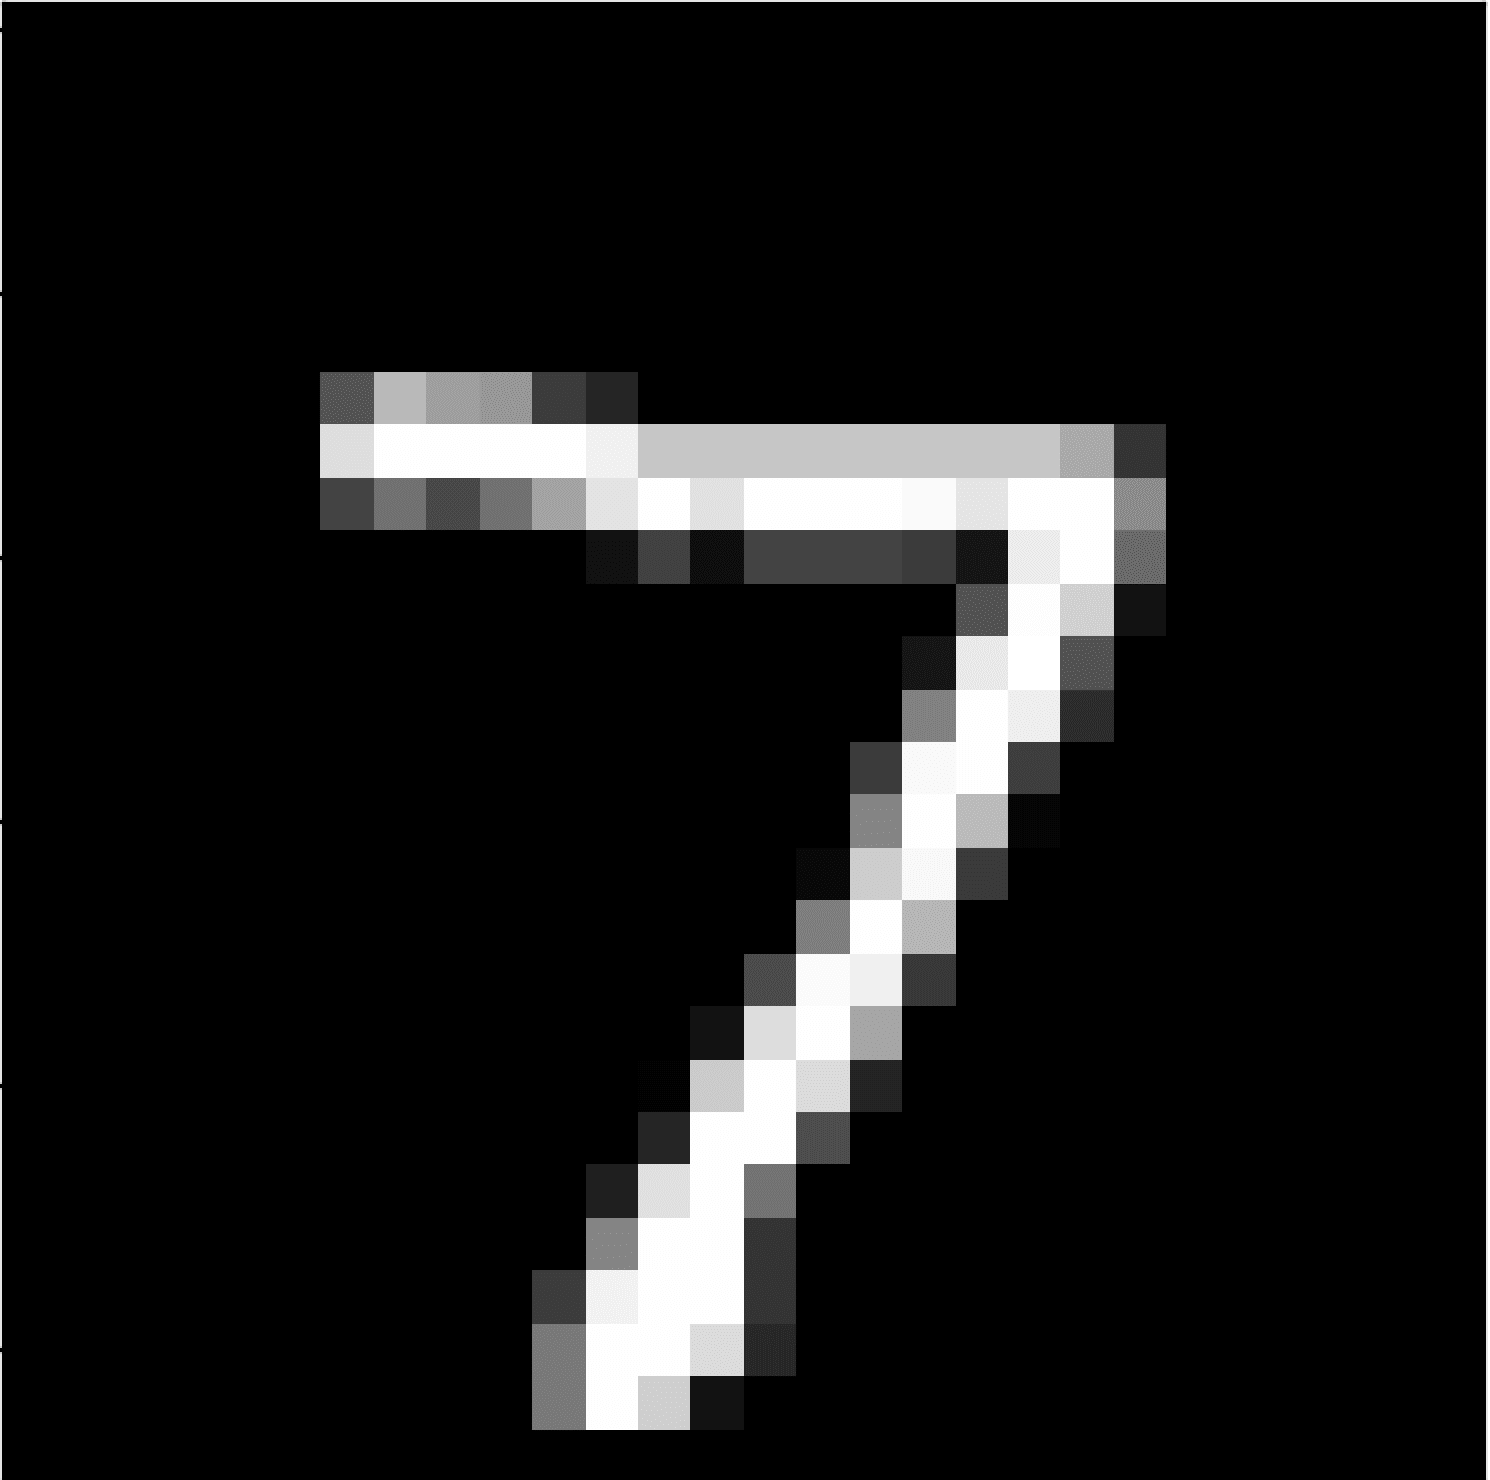

In [74]:
 cv2_imshow(input_image)

In [75]:
input_image.shape

(1480, 1490, 3)

In [76]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [78]:
grayscale.shape

(1480, 1490)

In [80]:
input_image_resize = cv2.resize(grayscale,(28,28))

In [81]:
input_image_resize.shape

(28, 28)

In [83]:
cv2_imshow(input_image_resize)

In [84]:
input_image_resize = input_image_resize/255

In [85]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])

In [86]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 22ms/step
[[1.7071937e-04 1.2091559e-02 4.2650481e-03 6.1363137e-01 2.2880677e-05
  1.6377206e-04 2.0278654e-11 9.9992728e-01 5.5785105e-03 2.0682772e-04]]


In [89]:
input_pred_label = np.argmax(input_prediction)

In [90]:
print(input_pred_label)

7


predictive system

path of the image to be predicted: /content/7mnist.png


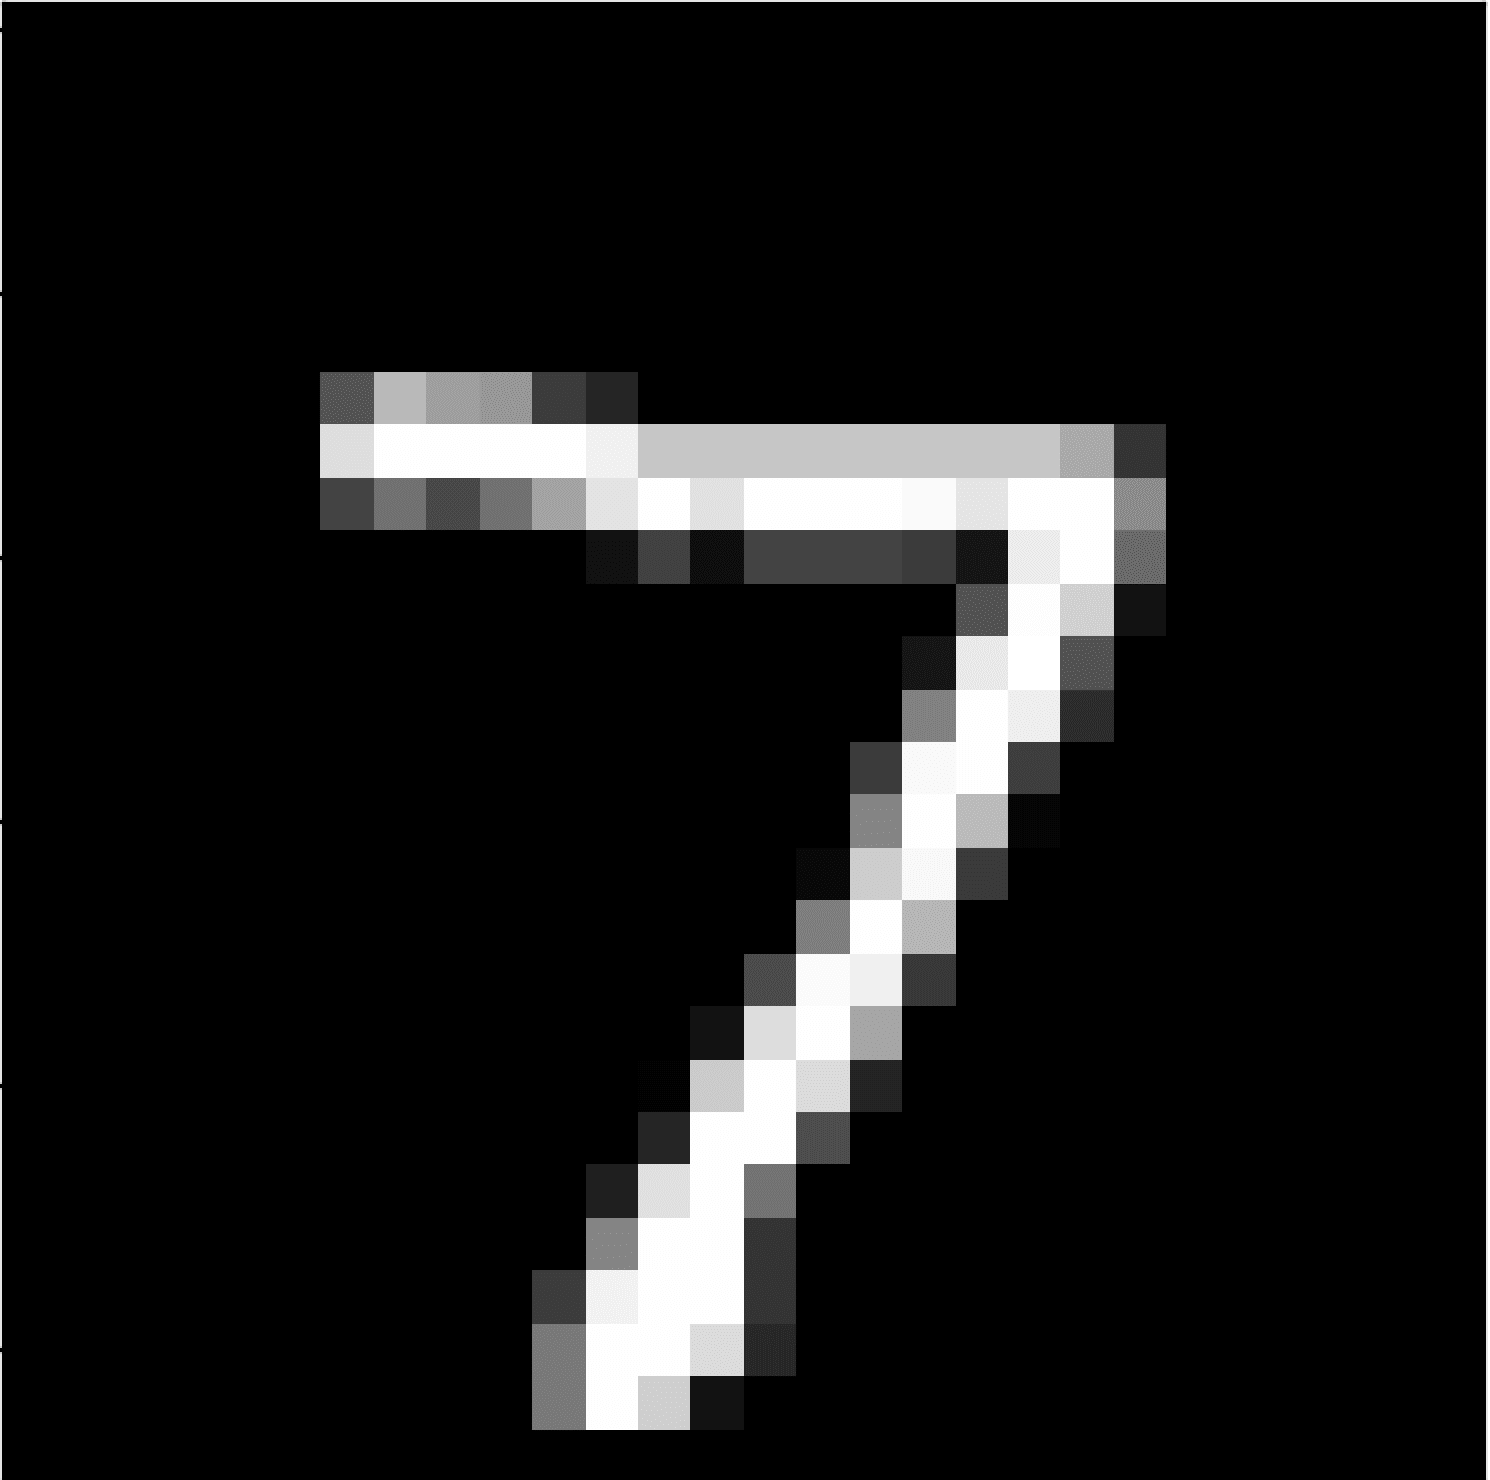

1/1 [==============================] - 0s 21ms/step
The handwritten digit is recognised as: 7


In [91]:
input_image_path = input('path of the image to be predicted: ' )

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale,(28,28))
input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The handwritten digit is recognised as:', input_pred_label)